Project/homework
There are two tasks to choose from. Do one or the other (obligatory).

House Prices prediction. Practice data review, cleaning/preparing, feature engineering. Finally, build a model for a price prediction.
Predict the "cut" feature from the diamonds dataset.
This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 13.03.2024.

In [3]:
!pip freeze|grep gdown

gdown==5.1.0


In [6]:
# House Price

import gdown
gdown.download('https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA', 'house.zip', quiet=False)

!unzip -o house.zip

Downloading...
From: https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA
To: /home/mg/AI/house.zip
100%|████████████████████████████████████████████████████████████████████████████████| 204k/204k [00:00<00:00, 2.83MB/s]

Archive:  house.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dates_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt']

test_data_csv = pd.read_csv("test.csv", parse_dates=dates_columns)
#print(test_data_csv['Id'].is_unique)
#We can switch to Id as index!
test_data_csv = test_data_csv.set_index('Id')

In [63]:
sample_submission_csv = pd.read_csv("sample_submission.csv")
sample_submission_csv = sample_submission_csv.set_index('Id')

print(sample_submission_csv.describe())
print(sample_submission_csv.shape)
print(sample_submission_csv.info())

test_data_csv["SalePrice"]=sample_submission_csv['SalePrice']

           SalePrice
count    1459.000000
mean   179183.918243
std     16518.303051
min    135751.318893
25%    168703.011202
50%    179208.665698
75%    186789.409363
max    281643.976117
(1459, 1)
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
None


# CONVERT DATES

In [64]:
#Convert Dates
#print(test_data_csv["YrSold"].isnull().any())
#print(test_data_csv["MoSold"].isnull().any())
year_month = ["YrSold",'MoSold']

test_data_csv["SoldDate"] = pd.to_datetime(test_data_csv[year_month[0]].astype(str) + test_data_csv[year_month[1]].astype(str),format='%Y%m' )
test_data_csv = test_data_csv.drop(columns=year_month);


# Clear out data from NA, convert

In [65]:
test_data_csv['Fence'] = test_data_csv['Fence'].fillna('NoFence')
test_data_csv['PoolQC'] = test_data_csv['PoolQC'].fillna('NoPoolQC')
test_data_csv['MiscFeature'] = test_data_csv['MiscFeature'].fillna('NoMiscFeature')
test_data_csv['Alley'] = test_data_csv['Alley'].fillna('NoAlley')

print(test_data_csv[test_data_csv.isna().any(axis=1)])


Fence
NoFence    1169
MnPrv       172
GdPrv        59
GdWo         58
MnWw          1
Name: count, dtype: int64
      MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
Id                                                                         
1461          20       RH         80.0    11622   Pave  NoAlley      Reg   
1462          20       RL         81.0    14267   Pave  NoAlley      IR1   
1463          60       RL         74.0    13830   Pave  NoAlley      IR1   
1465         120       RL         43.0     5005   Pave  NoAlley      IR1   
1466          60       RL         75.0    10000   Pave  NoAlley      IR1   
...          ...      ...          ...      ...    ...      ...      ...   
2914         160       RM         21.0     1526   Pave  NoAlley      Reg   
2915         160       RM         21.0     1936   Pave  NoAlley      Reg   
2916         160       RM         21.0     1894   Pave  NoAlley      Reg   
2917          20       RL        160.0    20000   Pa

In [15]:
print(test_data_csv.describe())
print(test_data_csv.info())
print(test_data_csv.shape)

        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   

                           YearBuilt                   YearRemodAdd  \
count                           1459                           1459   
mean   1971-05-11 19:25:37.217272104  1983-08-31 04:56:05.592871808   
min              1879-01-01 00:00:00            1950-01-01 00:00:00   
25%              1953-01-01 00:00:00    

In [59]:
print(test_data_csv[test_data_csv.isna().any(axis=1)])


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave    No      Reg   
1462          20       RL         81.0    14267   Pave    No      IR1   
1463          60       RL         74.0    13830   Pave    No      IR1   
1465         120       RL         43.0     5005   Pave    No      IR1   
1466          60       RL         75.0    10000   Pave    No      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1526   Pave    No      Reg   
2915         160       RM         21.0     1936   Pave    No      Reg   
2916         160       RM         21.0     1894   Pave    No      Reg   
2917          20       RL        160.0    20000   Pave    No      Reg   
2918          85       RL         62.0    10441   Pave    No      Reg   

     LandContour Utilities LotConfig  ... ScreenPo

In [66]:
## Price to area
test_data_csv['PricePerSqrFt'] = test_data_csv['SalePrice']/test_data_csv['LotArea']


count    1459.000000
mean       22.969199
std        14.897086
min         4.895677
25%        15.915339
50%        19.223482
75%        23.586116
max       112.796775
Name: PricePerSqrFt, dtype: float64


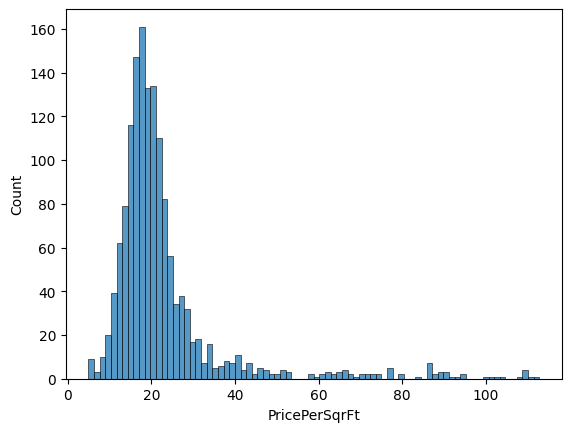

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=test_data_csv, x="PricePerSqrFt")
print(test_data_csv["PricePerSqrFt"].describe())

# FUNCTIONS FOR PLOTS!

In [203]:
#define Seaborn color palette to use
import numpy as np
def plot_pie_for_unique_category(df,col_name_x):
    colors = sns.color_palette('pastel')
    unique_v_df = (df[col_name_x].value_counts()).to_frame()
    unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
    plot = unique_v_df.plot.pie(y='count', figsize=(5,5), use_index=True,autopct='%0.2f%%')

def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    unique_v_df = (df[col_name_x].value_counts()).to_frame()
    unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
    fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
    i = 0;
    for index, row in unique_v_df.iterrows():
        value_percent = row.iloc[1];
        value = row.iloc[0];
        name = index;
        sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
        axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
        axs[i].legend()
        i+=1
    
def plot_unique_category(df,col_name_x,col_name_y,plotType=""):
    plot_hist_for_unique_category(df,col_name_x,col_name_y)
    plot_pie_for_unique_category(df,col_name_x)
    plt.title(f"{col_name_x} on {col_name_y}")

    plt.show()

    

# PLOTTING!

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

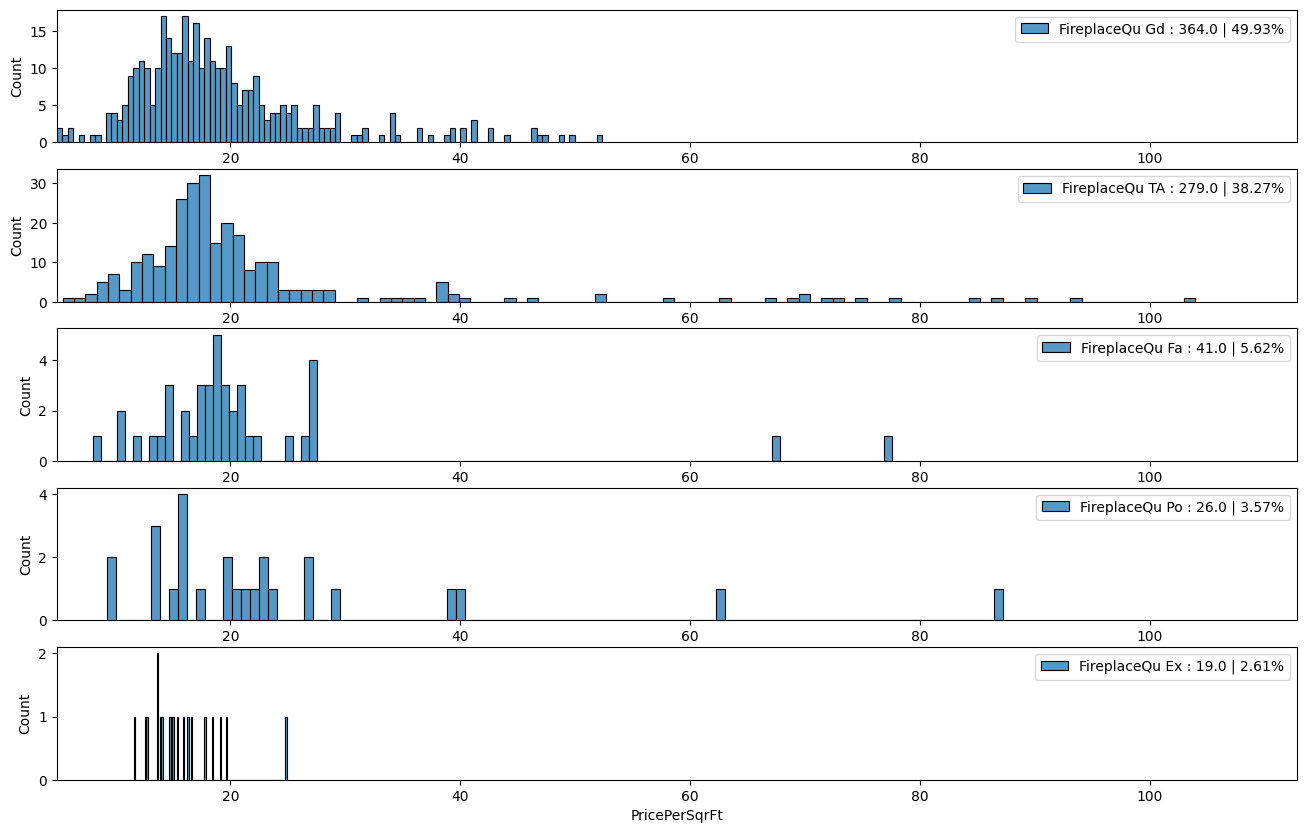

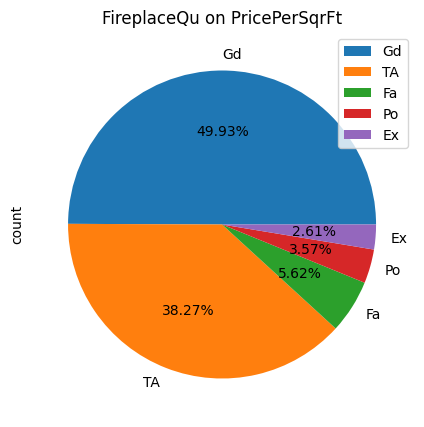

In [206]:
#EFILRYN FireplaceQu does not count into price
plot_unique_category(test_data_csv,'FireplaceQu','PricePerSqrFt');

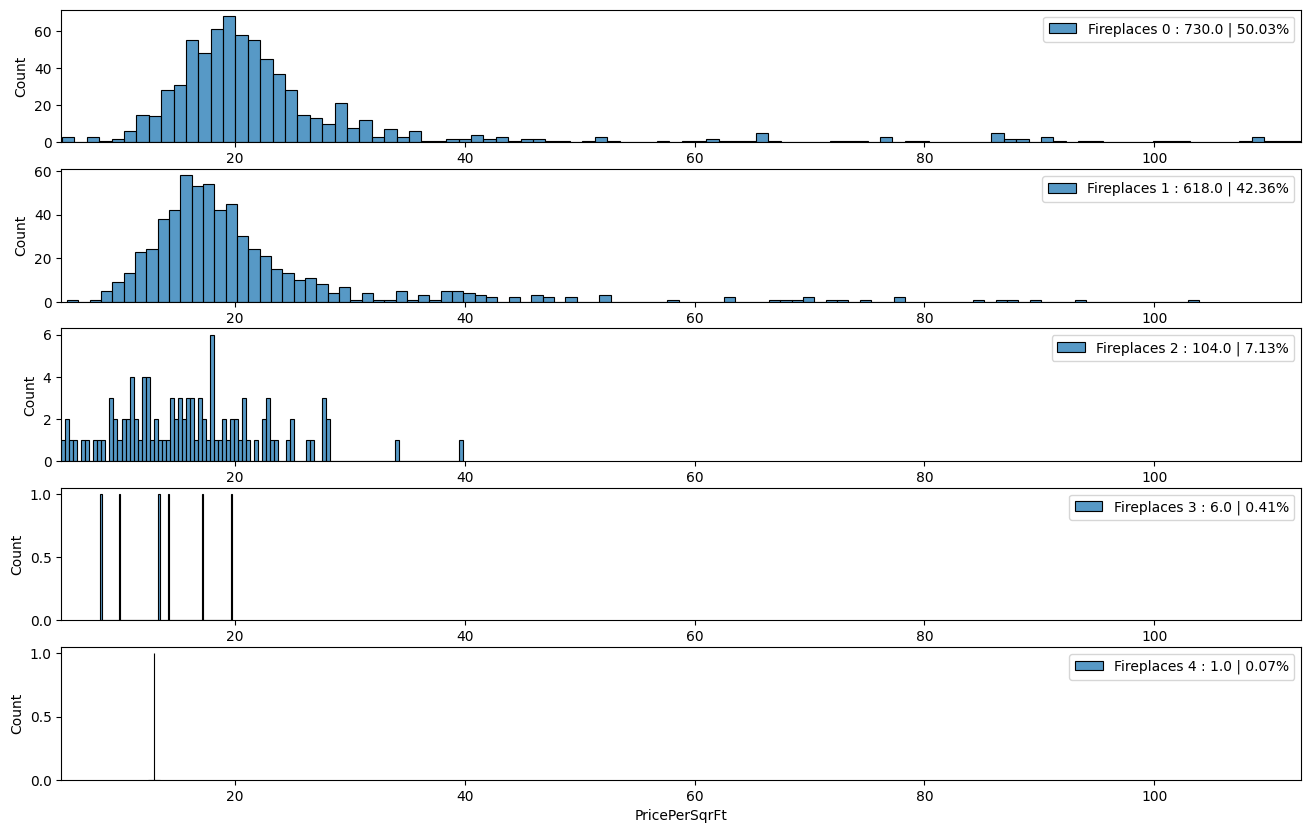

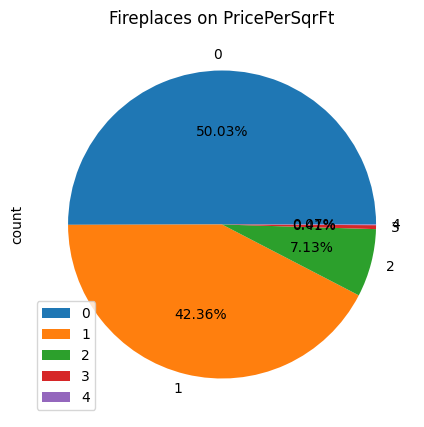

In [207]:
#EFILRYN Number Of fireplaces does not count into price
plot_unique_category(test_data_csv,'Fireplaces','PricePerSqrFt');

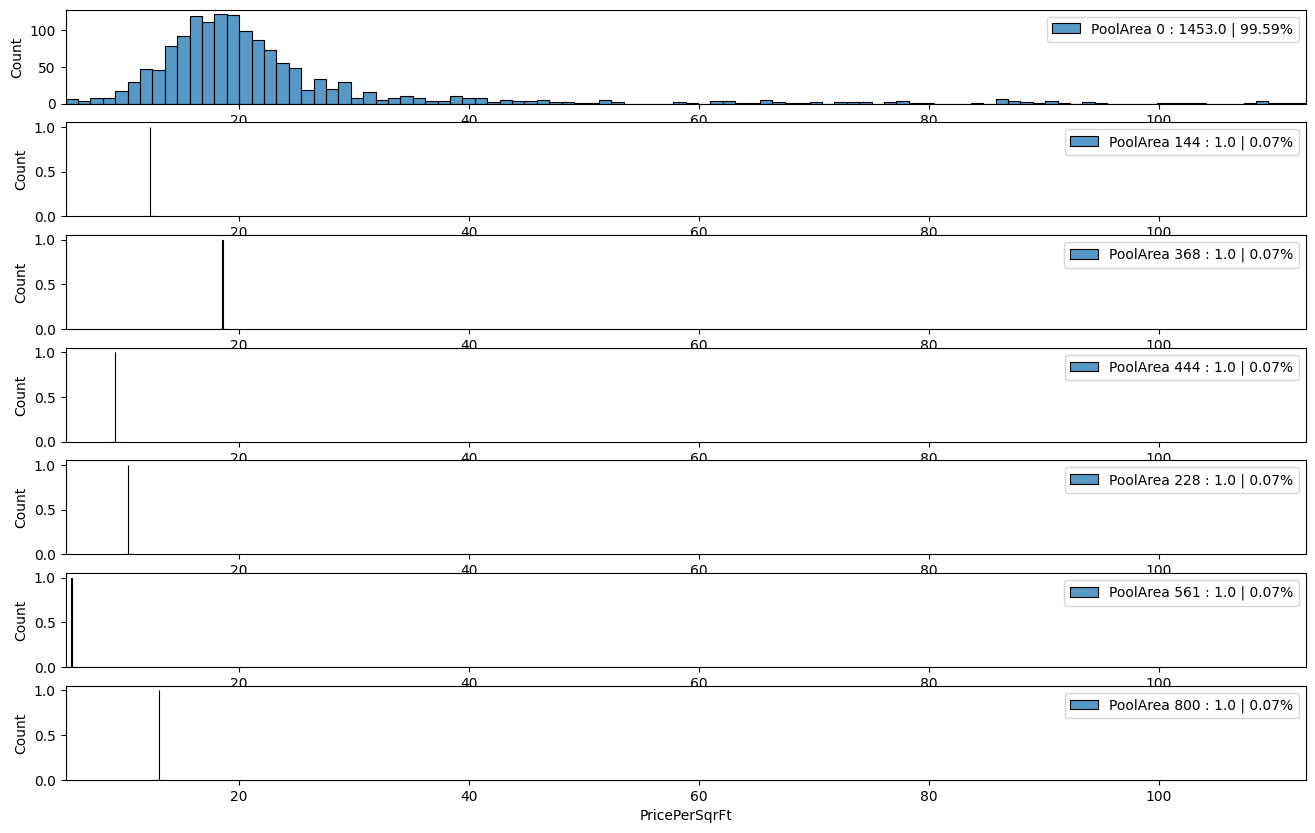

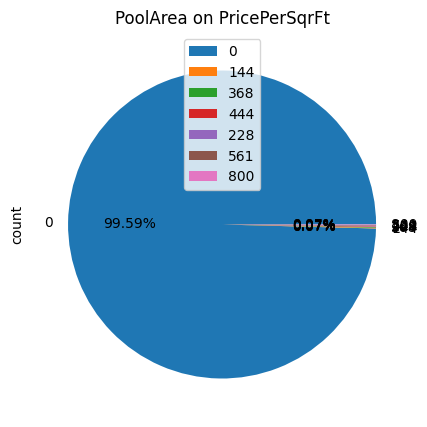

In [208]:
plot_unique_category(test_data_csv,'PoolArea','PricePerSqrFt');


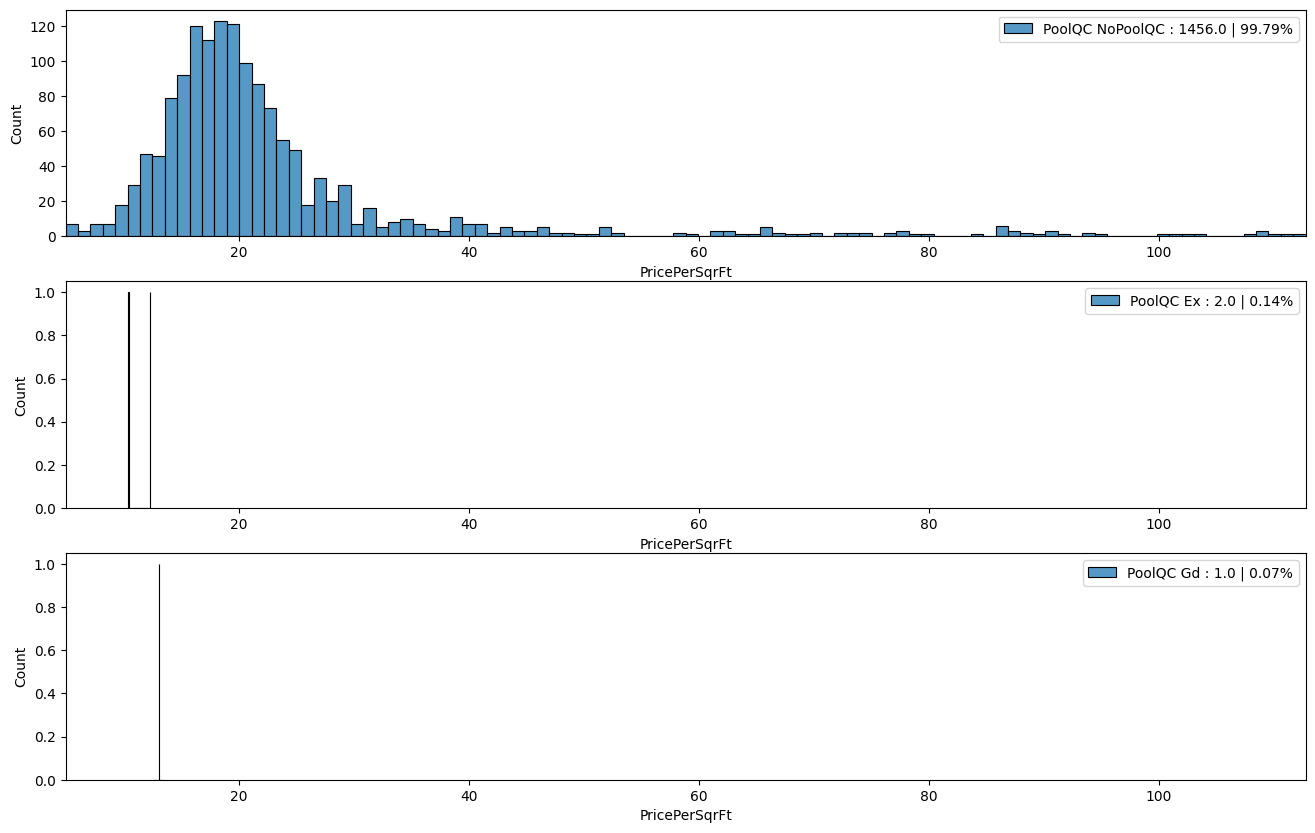

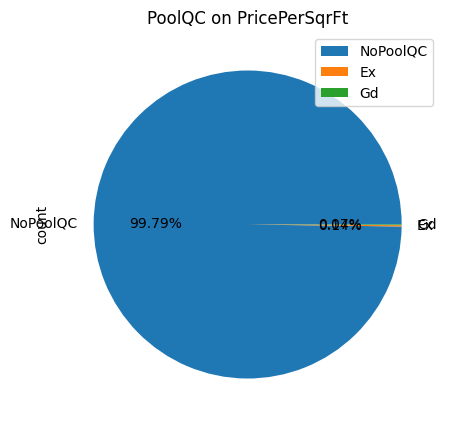

In [209]:
plot_unique_category(test_data_csv,'PoolQC','PricePerSqrFt');

#EFILRYN We can remove the Pool.

          count    percent
PoolArea                  
0          1453  99.588759
144           1   0.068540
368           1   0.068540
444           1   0.068540
228           1   0.068540
561           1   0.068540
800           1   0.068540


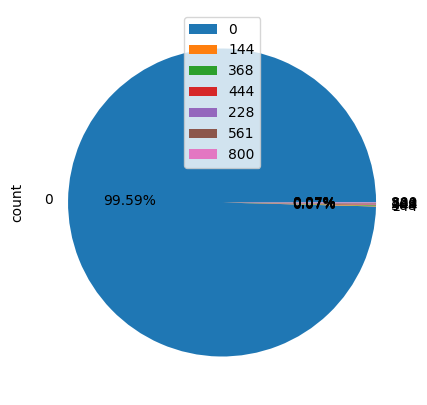

In [193]:
#define Seaborn color palette to use
import numpy as np
def plot_pie_for_unique_category(df,col_name_x,col_name_y):
    colors = sns.color_palette('pastel')
    unique_v_df = (df[col_name_x].value_counts()).to_frame()
    unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
    plot = unique_v_df.plot.pie(y='count', figsize=(5,5), use_index=True,autopct='%0.2f%%')
    print(unique_v_df)
    
#plot_pie_for_unique_category(test_data_csv,'PoolQC','PricePerSqrFt')
plot_pie_for_unique_category(test_data_csv,'PoolArea','PricePerSqrFt')
#plot_pie_for_unique_category(test_data_csv,'Fireplaces','PricePerSqrFt');


In [ ]:
train_data_csv = pd.read_csv("train.csv")
print(train_data_csv.describe())
print(train_data_csv.shape)